# Predicting heart disease using machine learning 
this notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable to predict whether or not someone has heart disease based on their medical attributes .

we are going to take the following approach:

1. problem definition
2. data
3. evaluation
4. features
5. modelling
6. experimentation
## 1.Problem Definition 
in a statement ,
> Given clinical parameters about a patient , can we predict wether or not they have heart disease ?
## 2.Data 
The original data came from the Cleavland data from the UCI machine learning Repository There is also a version of it available on Kaggle.
## 3.Evaluation 

> If we can reach 95% accuarcy at predicting wether or not a patient has heart disease durning the proof of concept , we'll purse the project .

## 4.Features 

**Create data dictionnary**
age. The age of the patient. sex. The gender of the patient. (1 = male, 0 = female). cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic). trestbps. Resting blood pressure in mmHg. chol. Serum Cholestero in mg/dl. fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise). restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy). thalach. Max heart rate achieved. exang. Exercise induced angina (1 = yes, 0 = no). oldpeak. ST depression induced by exercise relative to rest. slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping). ca. Number of major vessels (0–3) colored by flourosopy. thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect). num. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).



## Getting our Tools Ready 

### preparing the tools 
we are going to use pandas , matplotlib  and Numpy for data analysis and manipulation .

In [2]:
# Import all the tools we need 
# Regualar EDA(exploratory data analysis) and ploting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#we want our plots to appear inside the notebook 
%matplotlib inline 
#Models from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score, f1_score 
from sklearn.metrics import RocCurveDisplay 


## Load data 

In [3]:
df=pd.read_csv("heart-disease.csv")
df.shape #(rows,columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA )

The goal here is to find more about the data and become a subject matter export on the dataset you are  working with.

1. What question(s) are you trying to solve?
2. what kind of data  do we have and how do we treat diffrent types?
3. whats missing from the data and how do you deal with it
4. where ara the outliers and why should you care about them?
5. How can you add , change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# lets find out how many of each class there 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

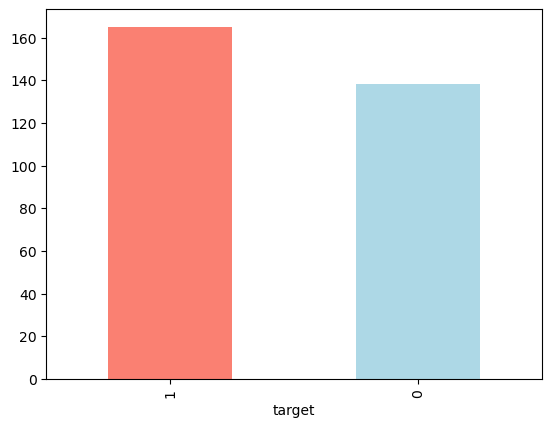

In [7]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#are there any missing values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Analysis

### Heart disease Fequency  according to sex

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


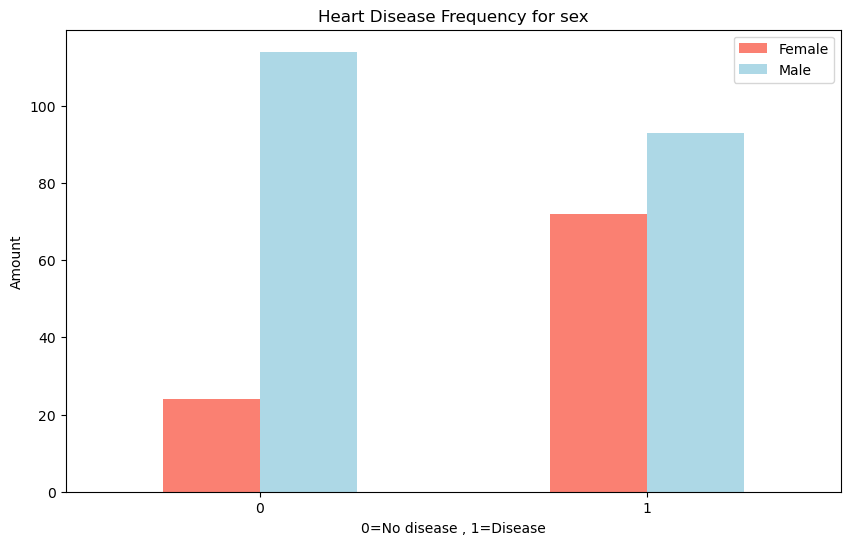

In [13]:
#create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0=No disease , 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [14]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease 

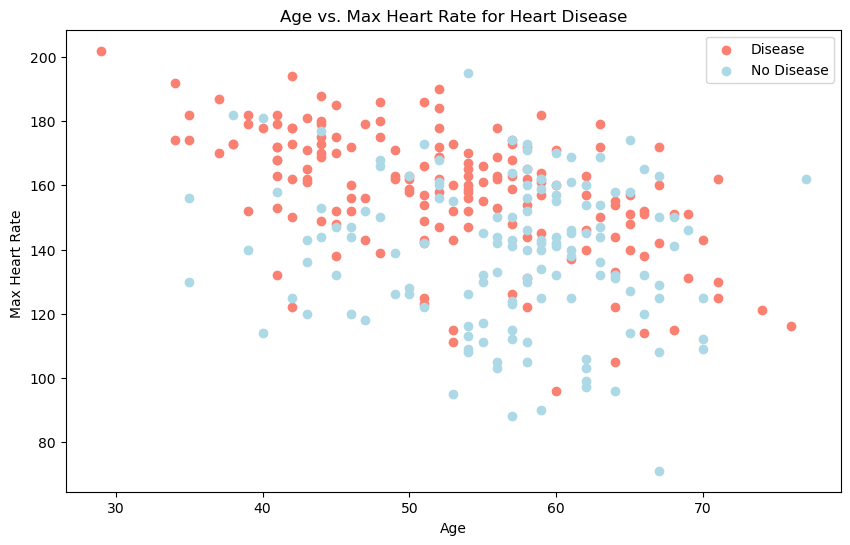

In [15]:
# create another figure 
plt.figure(figsize=(10,6))
#Scatter with positive examples (they have heart disease)
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples (they have no heart disease)

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],c="lightblue")

plt.xlabel("Age")
plt.ylabel("Max Heart Rate ")
plt.title("Age vs. Max Heart Rate for Heart Disease")
plt.legend(["Disease","No Disease"]);


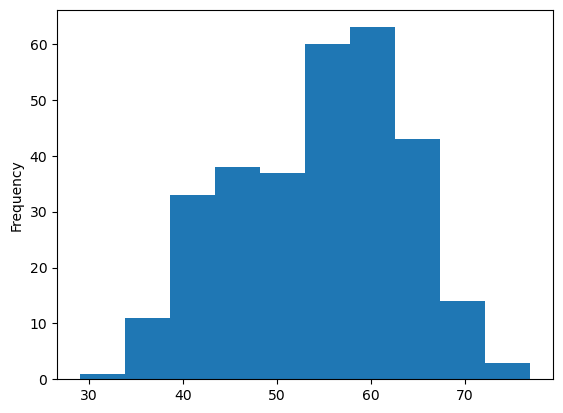

In [16]:
#check the distrubtion, of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain type 


In [17]:
#comapring the chest pain with the target 
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


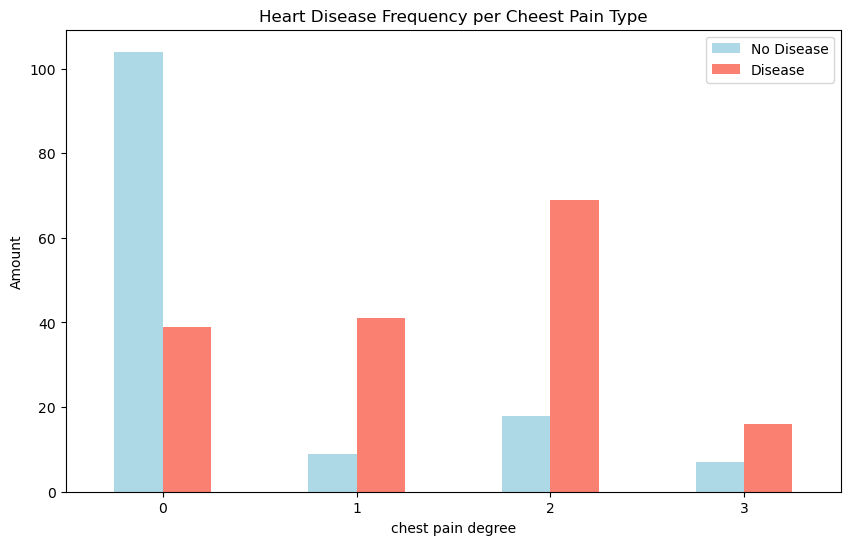

In [18]:
# Make the crosstab more visual 
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["lightblue","salmon"]);
plt.title("Heart Disease Frequency per Cheest Pain Type")
plt.xlabel("chest pain degree")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


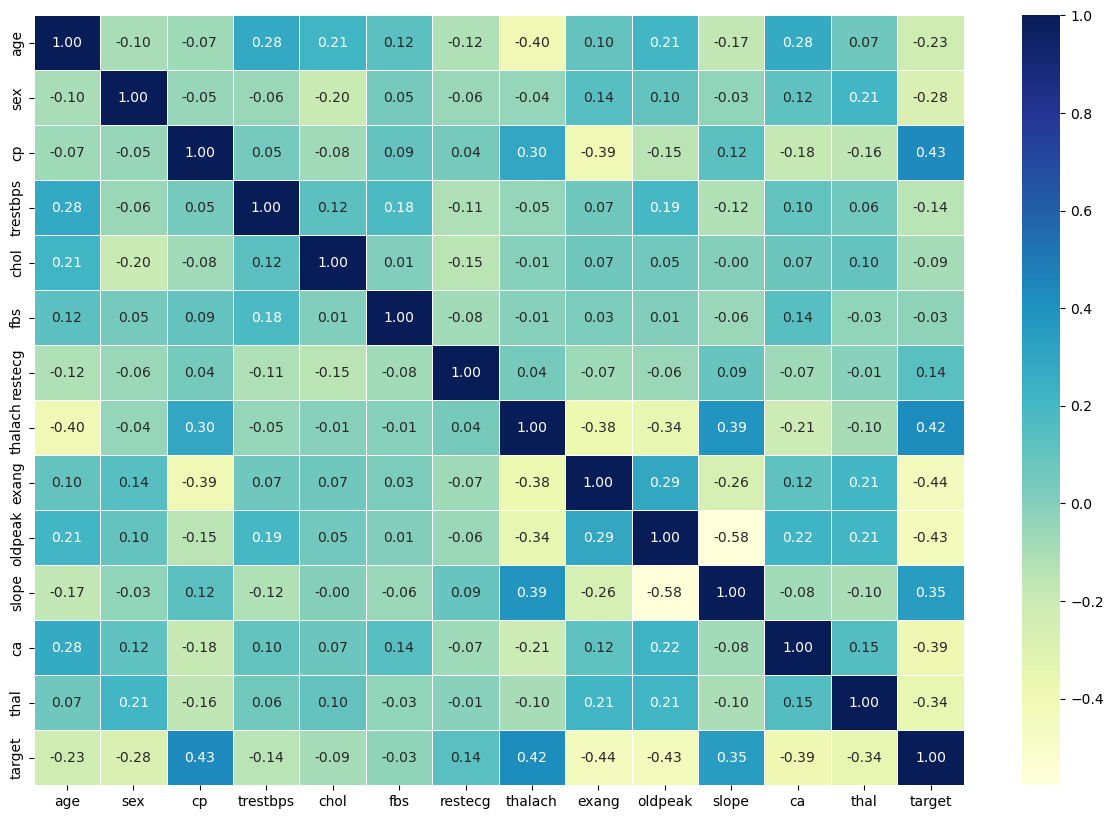

In [21]:
# Let's make our correlation matrix more visual 
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

## Preparing our data for machine learning 

## 5.Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Split data into x and y 
x=df.drop("target",axis=1)

y=df["target"]

In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
# split data into train and test sets 
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [27]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [28]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

now we have our data split into training and test sets , it's time to build a machine learning model
we will train it (find the patterns) on the training set.
and we'll test it (use the patterns) on the test set 

we are going to try 3 diffrent machine learning models:

1. Logistic Regression(despite its name it is a linear model for classification)
2. K-Nearest Neighbors
3. RandomForestClassifier 

In [29]:
models={
    "Logistic Regression":LogisticRegression(),
    "KNneighbors":KNeighborsClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

In [30]:
# np.random.seed(42)
# for model_name , model in models.items():
#     model.fit(x_train,y_train)
#     print(f"the accuracy of {model_name} is : {model.score(x_test,y_test)}")

In [31]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    """
    np.random.seed(42)
    #make a dictionnary to keep model scores
    model_score={}
    #loop through models 
    for model_name , model in models.items():
         model.fit(x_train,y_train)
         #evaluate the model and append its score to model_scores 
         model_score[model_name]=model.score(x_test,y_test)
    return model_score

In [32]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNneighbors': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

##  Experimenting With Machine Learning Models

## Model Comparison 

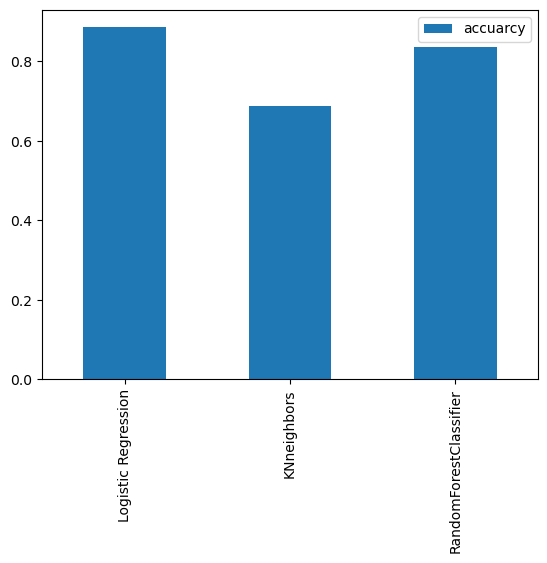

In [33]:
model_compare=pd.DataFrame(model_scores,index=["accuarcy"])
model_compare.T.plot.bar(); # the T for transposing the values 

## Tuning /Improving our Model

now we have got a baseline model... and we know a model is fisrt predictions aren't always what we should based our next steps off. What should we do?

Lets look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* precision
* recall
* f1 score
* classification report
* ROC curve
* AUC curve 

In [34]:
# Lets tune KNN
train_scores=[]
test_scores=[]
#create a list of diffrent values for n neighbors
neighbors=range(1,21)
#setup KNN instance 
knn=KNeighborsClassifier()
#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #fit the algorithm 
    knn.fit(x_train,y_train)
    #update training scores list 
    train_scores.append(knn.score(x_train,y_train))
    #update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [35]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [36]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:75.41%


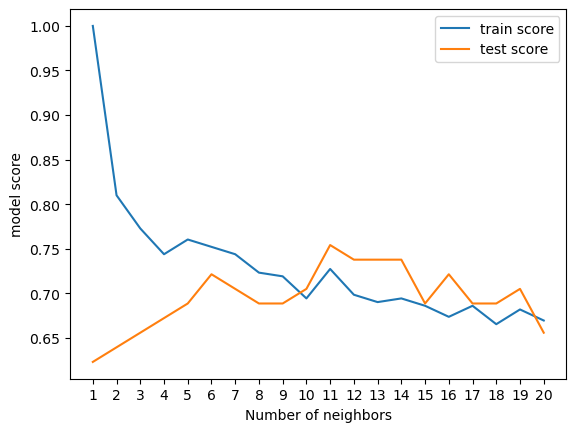

In [37]:
plt.plot(neighbors,train_scores,label="train score")
plt.plot(neighbors,test_scores,label="test score")
plt.xticks(range(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("model score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%");

## tuning with RandomizedSearchCV

we are going to tune :
* LogisticRegression()
* RandomForestClassifier()
  
... using RandomizedSearchCV 

In [38]:
#create a hyperparameter grid for LogisticRegression 
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
#create hyperparameter grid for RandomForestClassifier

RFC_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, 
lets tune them using RandomizedSearchCV

In [39]:
# Tune LogisticRegression 
np.random.seed(42)
#Setup random hyperparameter search for LogisticRegression 
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                             verbose=True)
#Fit random hyperparameter search model for LogisticRegression 
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we have tuned LogisticRegression() ,lets do the same for RandomForestClassifier()

In [42]:
np.random.seed(42)
#Setup random hyperparameter search for RandomForestClasifier 
rs_RFC=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=RFC_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
#Fit random hyperparameter search model for RandomForestClasifier 
rs_RFC.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
#find the best hyperparameter
rs_RFC.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
#Evaluate the RandomForestClassifier
rs_RFC.score(x_test,y_test)

0.8688524590163934

## tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far ,
we'll try and improve them again using GridSearchCV...

In [77]:
#Diffrent hyperparameter for our LogisticRegression 
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}


In [78]:
#setup grid hyperparameter search for LogisticRegression
np.random.seed(42)
gs_log_regr=GridSearchCV(LogisticRegression()
                         ,param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_regr.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [79]:
gs_log_regr.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [80]:
gs_log_regr.score(x_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier , beyond accuarcy

* ROC curve and AUC curve
* Confusion Matrix
* ClassificationReport
* presision
* recall
* f1-score

  and it would be great if cross validation was used where possible

  to make comparisons and evaluate our trained model , first we need predictions

In [85]:
y_preds=gs_log_regr.predict(x_test)

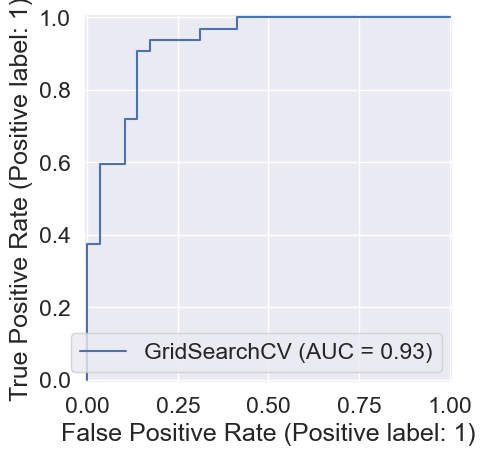

In [88]:
# Plot ROC curve and calculate AUC metric 

from sklearn.metrics import RocCurveDisplay

# Use the RocCurveDisplay.from_estimator method
RocCurveDisplay.from_estimator(gs_log_regr, x_test, y_test)


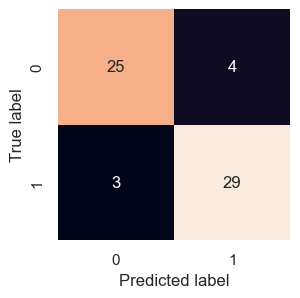

In [96]:
sns.set_theme(font_scale=1) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve an AUC metric and a confusion matrix , let's get a `ClassificationReport` as well as `Cross-validated presicion` ,`Recall` and `F1-score`

In [97]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate avalution metrics using cross-validation
We 're going to calculate accuarcy,precision , recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [101]:
# check best hyperparameters 
gs_log_regr.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [102]:
 # create a new classifier with best parameters 
clf=LogisticRegression(C =0.20433597178569418, solver= 'liblinear')


In [124]:
#cross validation accuarcy
accuarcy=cross_val_score(clf,x,y,scoring="accuracy",cv=5)
accuarcy=np.mean(accuarcy)
accuarcy

0.8446994535519124

In [125]:
#cross validation precision
precision=cross_val_score(clf,x,y,scoring="precision",cv=5)
precision=np.mean(precision)
precision

0.8207936507936507

In [126]:
#cross validation recall
recall=cross_val_score(clf,x,y,scoring="recall",cv=5)
recall=np.mean(recall)
recall

0.9212121212121213

In [127]:
#cross validation f1_score
f1_score=cross_val_score(clf,x,y,scoring="f1",cv=5)
f1_score=np.mean(f1_score)
f1_score

0.8673007976269721

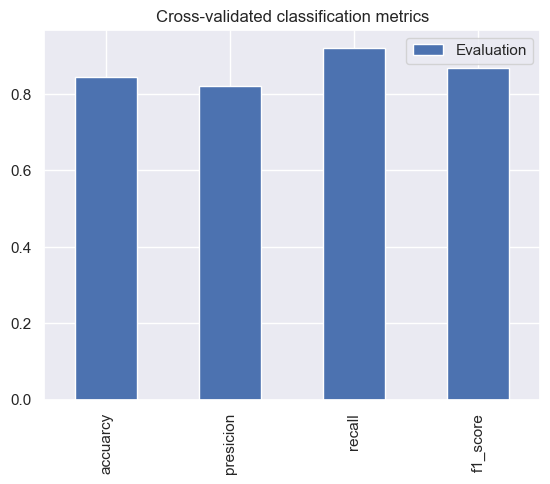

In [130]:
# visualize cross_validated metrics 
evaluation={"accuarcy":accuarcy,"presicion":precision,"recall":recall,"f1_score":f1_score}
cv_metrics=pd.DataFrame(evaluation,index=["Evaluation"])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics");

## Feature Importance 

Feature importance is another way as asking ,"which features contributed most to the outcomes of the model and how did they contribute ?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for"(MODEL NAME) feature importance"

Lets find the feature importance for our LogisticRegression model...

In [133]:
# Fit an instance of LogisticRegression 
gs_log_regr.best_params_
clf=LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')
clf.fit(x_train,y_train);


In [135]:
#check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [136]:
# Match coef's of features to columns 
feature_dict=dict(zip(df.columns , list(clf.coef_[0])))
feature_dict

{'age': 0.003167280425913024,
 'sex': -0.8604465017405314,
 'cp': 0.6606704375815468,
 'trestbps': -0.011569931400895204,
 'chol': -0.0016637445504085657,
 'fbs': 0.04386110683275644,
 'restecg': 0.3127584216723769,
 'thalach': 0.024593614040407018,
 'exang': -0.6041307979006147,
 'oldpeak': -0.5686280785492623,
 'slope': 0.45051628777983527,
 'ca': -0.6360989513753182,
 'thal': -0.6766337783287578}

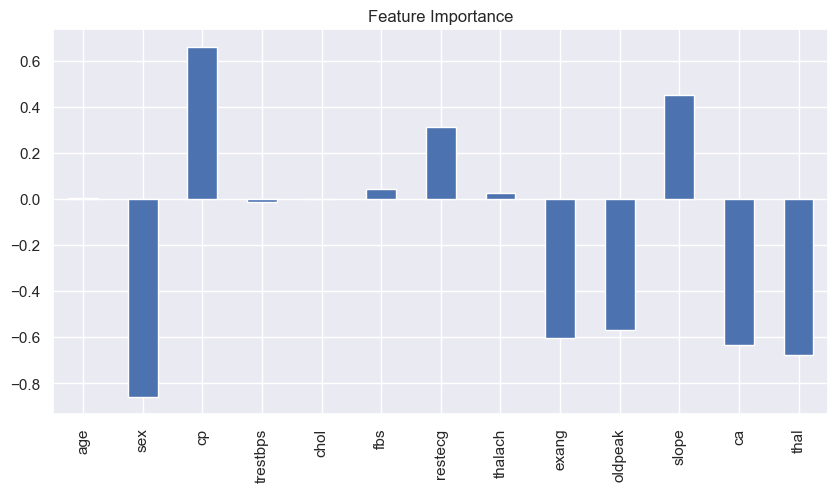

In [149]:
feature_importance=pd.DataFrame(feature_dict,index=[0])
feature_importance.T.plot.bar(title="Feature Importance",legend=False,figsize=(10,5));

In [151]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [150]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6.Experimentation
if you haven't hit your evaluation metric yet... ask yourself...

*  Could you collect more data ?
*  Could you try a better model ? like CatBoost or XGBoost?
*  Could you improve the current models? (beyond what we've done so far)
*  if your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?